# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [2]:
# importar a base de dados
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)
print(tabela.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [4]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.901208
Radio   0.054809  1.000000  0.354104  0.349631
Jornal  0.056648  0.354104  1.000000  0.157960
Vendas  0.901208  0.349631  0.157960  1.000000


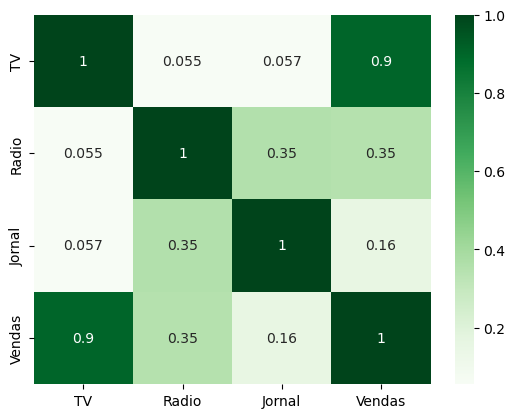

In [8]:
# correlação coloca numa escala de 0 a 1.
# no exemplo, é possível observar o quanto e como um item influencia no outro
# Exemplo 1:
# vendas tv 
# 10     2
# 20     4
# 30     6
# a Correlação acima seria = 1. Crescimento em proporções iguais. Mais TV = Mais vendas

import matplotlib.pyplot as plt
import seaborn as sns

print(tabela.corr())

# ciar um gráfico
# cmap = escala de cor / annot = exibir valores
sns.heatmap(tabela.corr(), cmap="Greens", annot=True)

# exibe o gráfico
plt.show()

# plotly - aula 2
# matplotlib
# seaborn


#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [21]:
# quando for receber mais de uma coluna da tabela, colocar entre 2 [] porque toda lista deve ficar entre colchetes no Python
y = tabela["Vendas"]
x = tabela[["TV", "Radio", "Jornal"]]

from sklearn.model_selection import train_test_split

# a ordem abaixo deve ser mantida x, y, treino e teste
# parâmetro "random_state=1" para evitar a variação do valor aleatório cada vez que rodar o programa (fins didáticos para a aula)
# parâmetro "test_size=0.3" deixa a proporção treino x teste em 70x30
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)




#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [22]:
# importar a inteligência artificial
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar a inteligência artificial
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinar a inteligÇencia artificial
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)


RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [23]:
# R² percentual da previsão
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

0.8418600977082005
0.9406221700335937


#### Visualização Gráfica das Previsões

,y_teste,Previsao Arvore Decisao,Previsao Regressaolienar
85,20.2,18.797,16.901450
103,19.7,19.687,16.817466
114,14.6,13.771,14.279870
102,19.8,18.341,20.945460
171,17.5,17.412,15.777212
52,22.6,21.838,21.120009
60,8.1,8.968,7.704632
159,12.9,12.404,13.796010
5,7.2,9.674,10.473081
199,18.4,18.036,18.254006


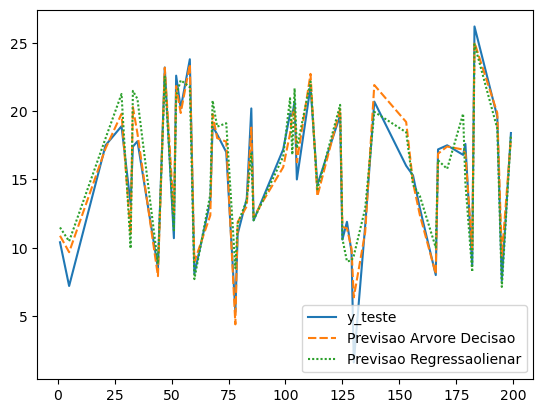

In [26]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsao Arvore Decisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsao Regressaolienar"] = previsao_regressaolinear

display(tabela_auxiliar)
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [27]:
nova_tabela = pd.read_csv("novos.csv")
display(nova_tabela)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [29]:
nova_previsao = modelo_arvoredecisao.predict(nova_tabela)
print(nova_previsao)

[ 7.579  9.76  20.709]
